# 선형회귀분석
최소제곱법(least squares method)를 사용해 정량적인 결과를 예측하는 기법  
[notion](https://www.notion.so/Regression-Analysis-d16b4a36688c4ba7bb1fc98035d11ed5?pvs=4)

In [1]:
STORAGE = strsplit(Sys.getenv("STORAGE"),",")[[1]] # 데이터 저장 위치

# 1. 단변량 선형회귀

In [2]:
data(anscombe)
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


In [3]:
# 상관계수
print(cor(anscombe$x1, anscombe$y1))
print(cor(anscombe$x2, anscombe$y2))

[1] 0.8164205
[1] 0.8162365


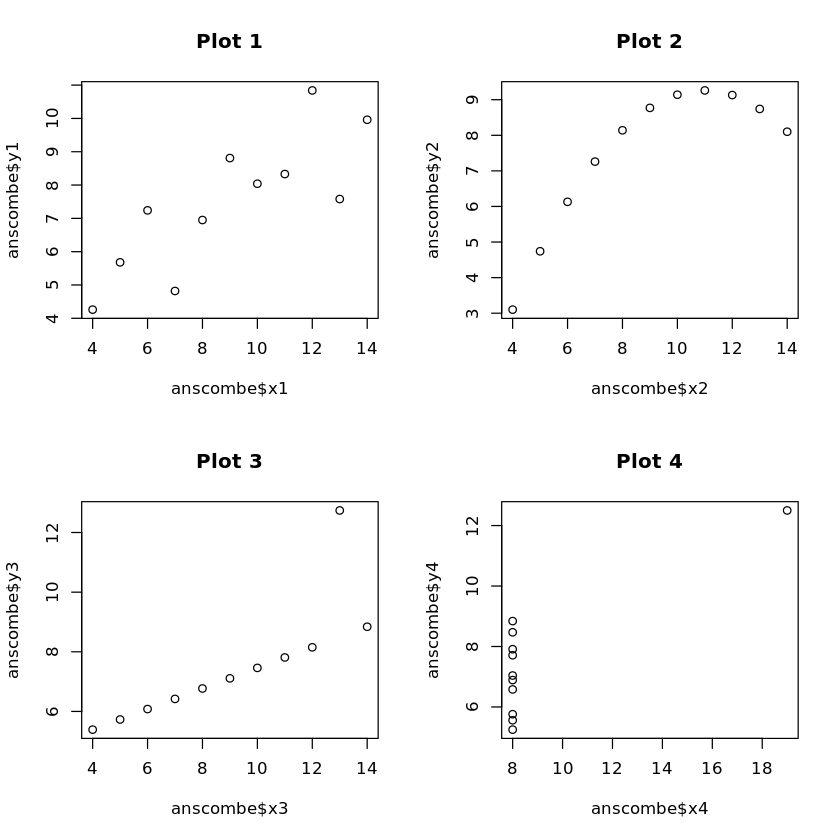

In [4]:
par(mfrow = c(2,2)) # 2x2형태의 그래프를 그림
plot(anscombe$x1, anscombe$y1, main="Plot 1")
plot(anscombe$x2, anscombe$y2, main="Plot 2")
plot(anscombe$x3, anscombe$y3, main="Plot 3")
plot(anscombe$x4, anscombe$y4, main="Plot 4")

- Plot1 : 선형관계를 가지는 것으로 확인된다.
- Plot2 : 선형관계가 아닌 곡선(2차식)으로 확인된다.
- Plot3 : 선형관계이지만 특이점이 존재한다. 이상치일 가능성이 있으며 데이터 수집단계부터 확인이 필요하다.
- Plot4 : 특이점 1개가 상관관계가 있는 것으로 보이게한다.

## SNAKE 데이터
설명 : Wyoming의 Snake강 유역의 눈의 수분함량과 물 생산량을 인치 단위로 제공

<변수 설명>
- X : 눈의 수분함량
- Y : 4월 부터 7월까지의 물 생산량

In [5]:
# 패키지 설치
snake = read.delim(paste(STORAGE, "Structured", "R", "data", "snake.txt",sep="/"), sep=" ", header=TRUE)

dim(snake) # 데이터 차원
head(snake)

[1] 17  2

,X,Y
,<dbl>,<dbl>
1,23.1,10.5
2,32.8,16.7
3,31.8,18.2
4,32.0,17.0
5,30.4,16.3
6,24.0,10.5


,content,yield
,<dbl>,<dbl>
1,23.1,10.5
2,32.8,16.7
3,31.8,18.2
4,32.0,17.0
5,30.4,16.3
6,24.0,10.5


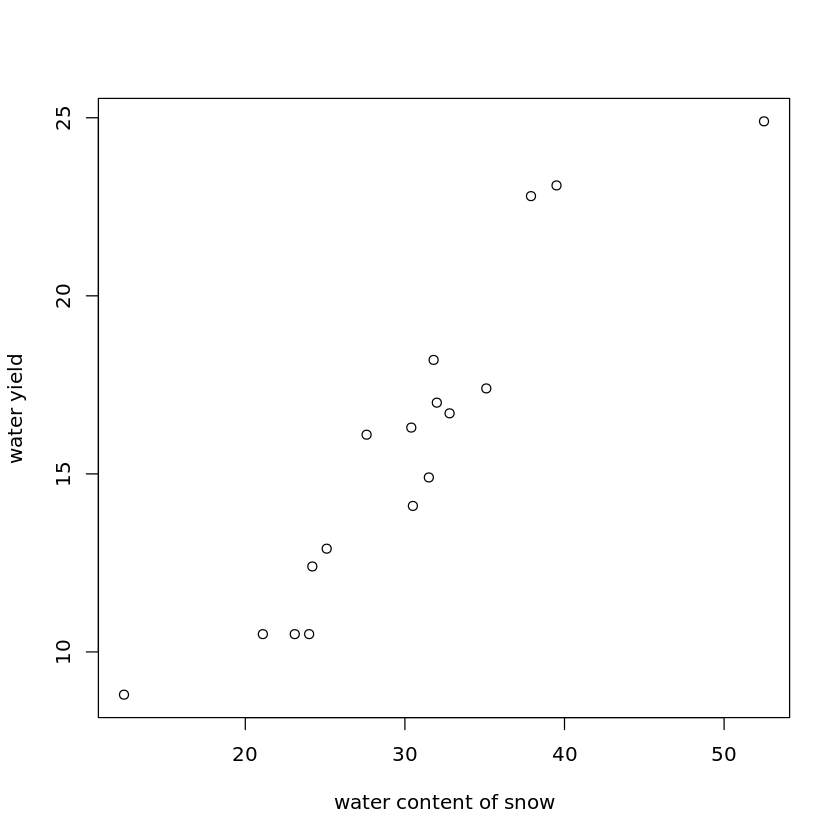

In [6]:
names(snake) <- c("content", "yield") # 이름 설정
head(snake)

par(mfrow=c(1,1))
plot(snake$content, snake$yield, xlab = "water content of snow", ylab = "water yield")

- 데이터가 거의 선형 관계를 가지며 양 끝점의 값은 이상치이다.
- 이상치가 문제가 없으면 그대로 사용하고 아니면 데이터 수집에 문제가 없었는지 확인해야 한다.
- 이상치를 사용할 수 있는 데이터로 보면 그래프는 곡선의 형태를 보인다.

In [7]:
# 회귀분석
yield.fit <- lm(data=snake, yield ~ content)
summary(yield.fit) # 회귀분석 결과


Call:
lm(formula = yield ~ content, data = snake)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1793 -1.5149 -0.3624  1.6276  3.1973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.72538    1.54882   0.468    0.646    
content      0.49808    0.04952  10.058 4.63e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.743 on 15 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8623 
F-statistic: 101.2 on 1 and 15 DF,  p-value: 4.632e-08


[추정된 회귀식]  
$ yield = 0.49808 \times content + 0.72538 $
- Intercept(절편)은 0.72538, content의 회귀계수는 0.49808로 추정하였다.
- F-statistic의 p-value를 확인해 보면 0.001 보다 작아 귀무가설(모든 회귀계수가 0이다.)을 기각한다. -> 회귀식이 의미가 있다.
- Pr(>|t|)로 추정된 회귀계수들의 유효성을 확인해보면 Intercept는 추정값이 유의하지 않고(귀무가설인 "추정값이 0이다"를 기각하지 못한다.) content는 값이 0.001보다 작아 추정값이 유의하다(귀무가설인 "추정값이 0이다"를 기각한다.)
- R^2(Multiple R-squared)는 0.8709로 yield의 변동값 중 약 87%는 content로 설명이 가능하다.

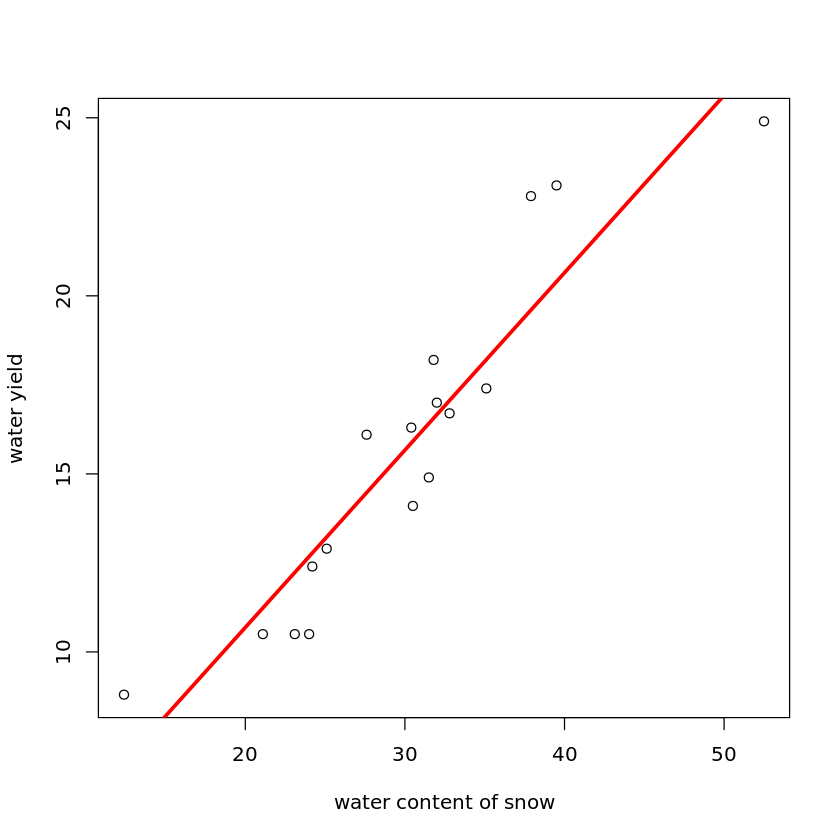

In [8]:
plot(snake$content, snake$yield, xlab = "water content of snow", ylab = "water yield")
abline(yield.fit, lwd=3, col="red")

[회귀모형의 가정]
- 선형성(linearlty) : 예측변수와 반응변수 사이의 선형적 관계를 가진다.
- 오차항의 비상관(non-correlation) : 수집된 자료사이에 서로 상관관계를 가지지 않는다. 시계열 자료나 패널 자료(다시점 자료)일 경우 오차항 사이에 상관관계가 존재할 수 있다.
- 등분산성(homoscedasticity) : 오차항은 정규분포를 따르며 같은 크기의 분산을 가진다. 이 가전을 위배하면 계수의 추정값이 편향되고, 통계적 유의성을 테스트할 때 지나치게 높거나 낮은값을 가진다.
- 비공선성(non-collinearity) : 두 예측변수는 서로 독립이다.
- 이상치의 부재(absence of outliers) : 이상치가 있으면 추정값이 왜곡될 수 있다.

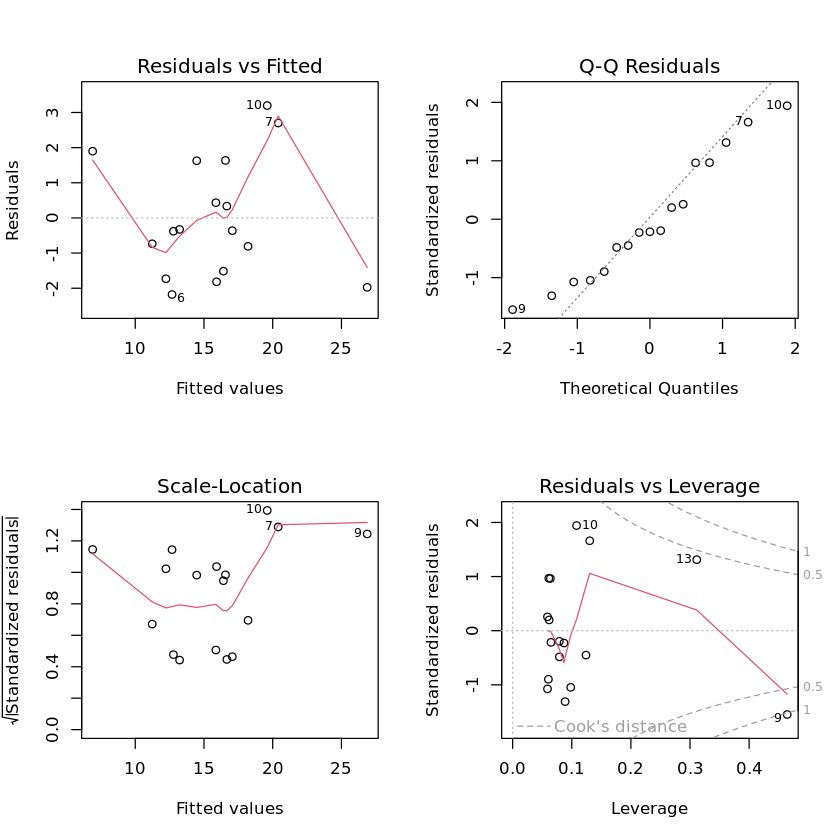

In [9]:
par(mfrow = c(2,2))
plot(yield.fit)

- Residuals vs Fitted : 무작위의 형태를 보이면 종속변수와 독립변수가 선형관계를 가진다.  
    현재 그래프에서 특이한 패턴이 보이지 않아 선형관계를 가진다고 볼 수 있다.
- Scale-Location : 오차의 등분산성을 확인  
    현재 그래프에서 특이한 형태(u자, 깔때기 등)가 보이지 않아 등분산성을 만족한다고 볼 수 있다.  
- Q-Q Residuals : 오차항이 정규분포를 따를는지 확인 직선에 가까울수록 정규분포를 따른다.
    현재 그래프에서 9,7,10 관측치가 직선에서 벗어나 오차항이 정규분포를 띤다는 가정을 위배한다.
- Residuals vs Leverage : Cook's distance에서 1보다 큰 값이 이상치일 가능성이 높다.  
    현재 그래프에서 9번 관측치가 Cook's distance가 1보다 커 이상치로 문제가 있다.

Loading required package: carData



[1]  7 10

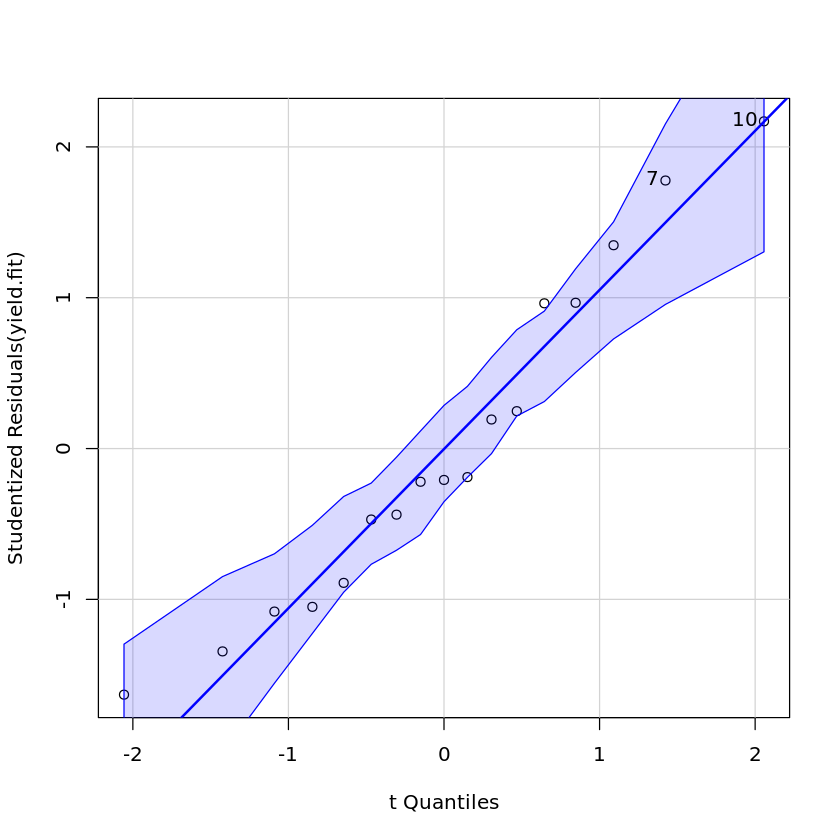

In [10]:
# install.packages("car")
library(car)
qqPlot(yield.fit)

그래프에서는 오차가 정규분포를 따른다고 나타난다.

# 2. 다변량 선형 회귀